# Summarizing video data from single horizontal lines

Leanne Friedrich 08/02/21

## initialization

In [1]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [2]:
import os
import sys
sys.path.append("../")
from py.config import cfg
import py.logs as logs
import py.metrics as me
from printVals import *
from plainIm import plainIm
import matplotlib.pyplot as plt
import metricPlots as mp
import regression as rg
import matplotlib.cm as cm
LOGGERDEFINED = logs.openLog('vidSummaries.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

## analyzing data

In [3]:
ss,u = me.importStillsSummary(diag=True)
seg, useg = me.importStillsSummary(file='segmentsSummary.csv', diag=False)
ss = ss.merge(seg[['folder', 'horiz_segments']], on='folder', suffixes=['', '_manual'], how='left')

Independents: ['folder', 'bn', 'date', 'sigma', 'di', 'do', 'fluFile', 'calibFile', 'viscRatio', 'vRatio', 'ReRatio', 'rGrav', 'dEst', 'hDragP', 'vDragP', 'int_CaInv', 'int_Re', 'pressureCh0', 'ink_shortname', 'ink_days', 'ink_rheModifier', 'ink_surfactant', 'ink_dye', 'ink_var', 'ink_val', 'ink_base', 'ink_type', 'ink_tau0', 'ink_eta0', 'ink_density', 'ink_v', 'ink_rate', 'ink_visc0', 'ink_CaInv', 'ink_Re', 'ink_WeInv', 'ink_OhInv', 'ink_dPR', 'ink_dnormInv', 'ink_Bm', 'sup_shortname', 'sup_days', 'sup_rheModifier', 'sup_surfactant', 'sup_dye', 'sup_var', 'sup_val', 'sup_base', 'sup_type', 'sup_tau0', 'sup_eta0', 'sup_density', 'sup_v', 'sup_rate', 'sup_visc0', 'sup_CaInv', 'sup_Re', 'sup_WeInv', 'sup_OhInv', 'sup_dPR', 'sup_dnormInv', 'sup_Bm', 'sup_Ca', 'ink_Ca', 'sweepType', 'sup_dnorm', 'ink_dnorm', 'sup_We', 'ink_We', 'sup_Oh', 'ink_Oh', 'int_Ca']

Dependents: ['xs_aspect', 'xs_xshift', 'xs_yshift', 'xs_area', 'xs_areaN', 'xs_wN', 'xs_hN', 'xs_roughness', 'vert_wN', 'vert_hN', 'v

In [4]:
vs,uv = me.importStillsSummary(file='videoSummary.csv', diag=True)
seg, useg = me.importStillsSummary(file='segmentsSummary.csv', diag=False)
vs = vs.merge(seg[['folder', 'wetting', 'horiz_segments']], on='folder', suffixes=['', ''], how='left')

Independents: ['folder', 'bn', 'date', 'sigma', 'di', 'do', 'fluFile', 'calibFile', 'viscRatio', 'vRatio', 'ReRatio', 'rGrav', 'dEst', 'hDragP', 'vDragP', 'int_CaInv', 'int_Re', 'pressureCh0', 'ink_shortname', 'ink_days', 'ink_rheModifier', 'ink_surfactant', 'ink_dye', 'ink_var', 'ink_val', 'ink_base', 'ink_type', 'ink_tau0', 'ink_eta0', 'ink_density', 'ink_v', 'ink_rate', 'ink_visc0', 'ink_CaInv', 'ink_Re', 'ink_WeInv', 'ink_OhInv', 'ink_dPR', 'ink_dnormInv', 'ink_Bm', 'sup_shortname', 'sup_days', 'sup_rheModifier', 'sup_surfactant', 'sup_dye', 'sup_var', 'sup_val', 'sup_base', 'sup_type', 'sup_tau0', 'sup_eta0', 'sup_density', 'sup_v', 'sup_rate', 'sup_visc0', 'sup_CaInv', 'sup_Re', 'sup_WeInv', 'sup_OhInv', 'sup_dPR', 'sup_dnormInv', 'sup_Bm', 'sup_Ca', 'ink_Ca', 'sweepType', 'sup_dnorm', 'ink_dnorm', 'sup_We', 'ink_We', 'sup_Oh', 'ink_Oh', 'int_Ca']

Dependents: ['projectionN', 'projShiftN', 'vertDispBotN', 'vertDispTopN', 'vertDispMidN']


# video data

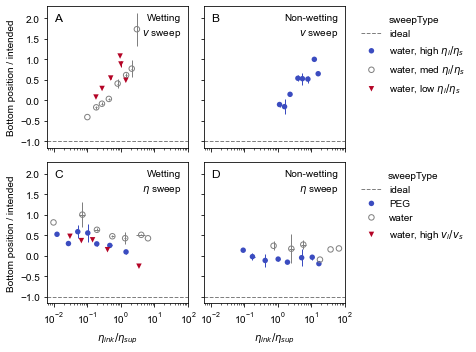

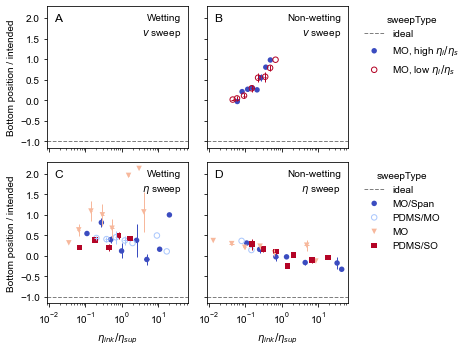

In [5]:
# vertDispBotN = -1: bottom of filament is 1 estimated filament diameter below bottom of nozzle
# projectionN = -1: bottom of filament is 1 estimated filament diameter below bottom of nozzle

sslap = vs.copy()
sslap = sslap[sslap.sigma==0]
ssca = vs.copy()
ssca = ssca[ssca.sigma>0]
# ssca = ssca[ssca.horiz_segments==3]
for k, ss11 in enumerate([sslap, ssca]):
    ss1 = ss11.copy()
    ss1 = ss1.sort_values(by=['sigma', 'sweepType'])
    ss1 = ss1[ss1.ink_days==1]
#     mp.simplifyType(ss1)

    ssvisc = ss1[ss1.sweepType.str.startswith('visc')]
    ssspeed = ss1[ss1.sweepType.str.startswith('speed')]
    fig,axs = plt.subplots(2,2,figsize=(6.5, 5), sharey=True, sharex=True)
    fs = 10
    for i,ss0 in enumerate([ssspeed, ssvisc]):
        for j,w in enumerate([1,0]):
            sstemp = ss0.copy()
            sstemp.loc[sstemp.wetting!=w, 'viscRatio'] = -1
            me.plainTypes(sstemp, incSweep=False)
            mp.scatterSS(sstemp, 'viscRatio', 'vertDispBotN', 'sweepType', logx=True, yideal=-1, ax=axs[i][j], fig=fig, 
                           legend=(j==1), legendloc='right', dx=0.15, fontsize=fs, markersize=30)
            if w==0:
                axs[i][j].text(0.95, 0.95, 'Non-wetting', fontsize=fs, transform=axs[i][j].transAxes, horizontalalignment='right', verticalalignment='top')
            else:
                axs[i][j].text(0.95, 0.95, 'Wetting', fontsize=fs, transform=axs[i][j].transAxes, horizontalalignment='right', verticalalignment='top')
            if i==0:
                axs[i][j].text(0.95, 0.85, '$v$ sweep', fontsize=fs, transform=axs[i][j].transAxes, horizontalalignment='right', verticalalignment='top')
            else:
                axs[i][j].text(0.95, 0.85, '$\eta$ sweep', fontsize=fs, transform=axs[i][j].transAxes, horizontalalignment='right', verticalalignment='top')
                
            axs[i][j].set_xlabel('$\eta_{ink}/\eta_{sup}$')
    axs[0][0].set_xlabel('')
    axs[0][1].set_xlabel('')
    for axrow in axs:
        for ax in axrow:
#             ax.set_xlim([0.5*10**-2, 6*10])
            mp.setSquare(ax)
        axrow[0].set_ylabel('Bottom position / intended')
        axrow[1].set_ylabel('')
    plt.subplots_adjust(wspace=0, hspace=0)
    mp.subFigureLabels(axs)
    fig.tight_layout()
    fig.savefig(os.path.join(cfg.path.fig, 'paper figures', 'supfigures', f'wetting vert disp_{k}.pdf'), bbox_inches='tight', dpi=300)

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:title={'center':'vertDispBotN'}, xlabel='ink_val', ylabel='sup_val'>)

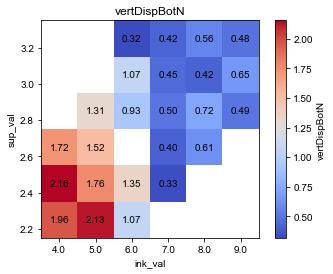

In [122]:
mp.colorMeshSS(vsr, 'ink_val', 'sup_val', 'vertDispBotN')

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='visc0Prod', ylabel='vertDispBotN'>)

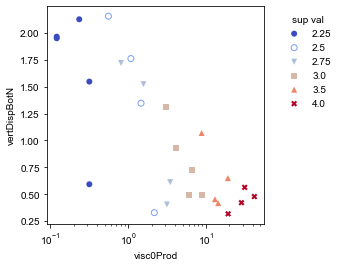

In [125]:
fig, ax = mp.scatterSS(vsr, 'visc0Prod', 'vertDispBotN', 'sup_val', logx=True, dx=0, dy=0)

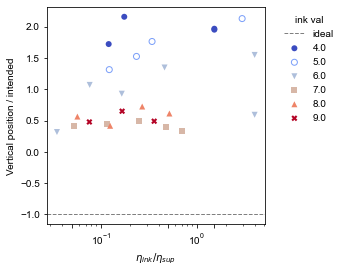

In [6]:
vsr = vs[(vs.sweepType=='visc_M')&(vs.wetting==1)]
# fig,axs = plt.subplots(2,1, figsize=(3,6), sharex=True, sharey=True)
# mp.scatterSS(vsr, 'viscRatio', 'vertDispBotN', 'sup_val', logx=True, dx=0, dy=0, ax=axs[0], legendloc='right')
fig, ax = mp.scatterSS(vsr, 'viscRatio', 'vertDispBotN', 'ink_val', logx=True, dx=0, dy=0, yideal=-1, legendloc='right')
ax.set_xlabel('$\eta_{ink}/\eta_{sup}$')
ax.set_ylabel('Vertical position / intended')
fig.savefig(os.path.join(cfg.path.fig, 'paper figures', 'supfigures', f'wetting vert disp_mineral.pdf'), bbox_inches='tight', dpi=300)
# vs[(vs.sweepType=='visc_20')&(vs.wetting==1)]

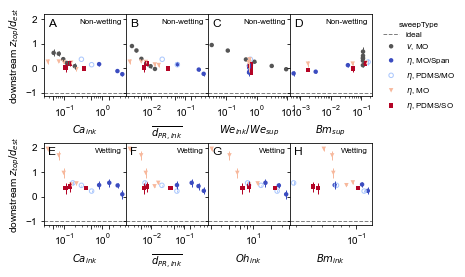

In [7]:
# vertDispBotN = -1: bottom of filament is 1 estimated filament diameter below bottom of nozzle
# projectionN = -1: bottom of filament is 1 estimated filament diameter below bottom of nozzle

ss1 = vs.copy()
ss1 = ss1.sort_values(by=['sigma', 'sweepType'])
ss1 = ss1[ss1.ink_days==1]
mp.simplifyType(ss1)
me.plainTypes(ss1)
ssca = ss1[ss1.sigma>0]
me.addRatios(ssca, varlist=['We'], operator='Ratio')
fig,axs = plt.subplots(2,4,figsize=(6.5, 4.25), sharey=True, sharex=False)
fs = 8
for j,w in enumerate([0,1]):
    for i,xvar in enumerate([['ink_Ca','ink_dnorm', 'WeRatio', 'sup_Bm'], ['ink_Ca','ink_dnorm', 'ink_Oh', 'ink_Bm']][j]):
        mp.sweepTypeSS(ssca[ssca.wetting==w], xvar, 'vertDispBotN', logx=True, yideal=-1, ax=axs[j][i], fig=fig, 
                       legend=((i==3)&(j==0)), legendloc='right', dx=0.2, fontsize=fs, markersize=20, set_ylabel=(i==0))
        if w==0:
            axs[j][i].text(0.95, 0.95, 'Non-wetting', fontsize=fs, transform=axs[j][i].transAxes, horizontalalignment='right', verticalalignment='top')
        else:
            axs[j][i].text(0.95, 0.95, 'Wetting', fontsize=fs, transform=axs[j][i].transAxes, horizontalalignment='right', verticalalignment='top')
# for axrow in axs:
#     axrow[0].set_xlim([5*10**-2, 3])
#     axrow[1].set_xlim([3*10**-3, 0.3])
for axrow in axs:
    for ax in axrow:
        mp.setSquare(ax)
fig.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
mp.subFigureLabels(axs)
fig.savefig(os.path.join(cfg.path.fig, 'paper figures', 'supfigures', 'vert_disp_corrs_nonzero.pdf'), bbox_inches='tight', dpi=300)

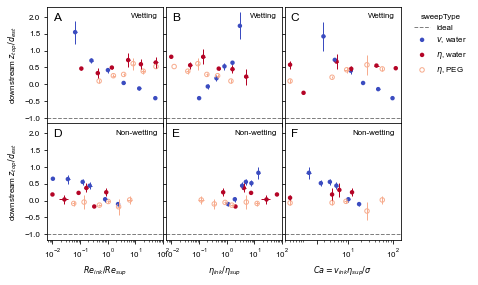

In [9]:
# vertDispBotN = -1: bottom of filament is 1 estimated filament diameter below bottom of nozzle
# projectionN = -1: bottom of filament is 1 estimated filament diameter below bottom of nozzle
sslap = vs.copy()
sslap = sslap[sslap.sigma==0]
mp.simplifyType(sslap)
me.plainTypes(sslap)
sslap.loc[sslap.sigma==0,'sigma'] = 2
sslap['int_Ca'] = sslap['ink_v']*sslap['sup_visc0']/sslap['sigma']
sslap['sup_Ca'] = sslap['sup_v']*sslap['sup_visc0']/sslap['sigma']
sslap['ink_Ca'] = sslap['ink_v']*sslap['ink_visc0']/sslap['sigma']
me.addRatios(ssca, varlist=['We'], operator='Ratio')
fig,axs = plt.subplots(2,3,figsize=(6.5, 4), sharey=True, sharex='col')
fs = 8
for j,w in enumerate(sslap.wetting.unique()):
    for i,xvar in enumerate(['ReRatio', 'viscRatio', 'int_Ca']):
        mp.sweepTypeSS(sslap[sslap.wetting==w], xvar, 'vertDispBotN', logx=True, yideal=-1, ax=axs[j][i], fig=fig, 
                       legend=((i==2)&(j==0)), legendloc='right', dx=0.2, fontsize=fs, markersize=20, set_ylabel=(i==0), set_xlabel=(j==1))
        if w==0:
            axs[j][i].text(0.95, 0.95, 'Non-wetting', fontsize=fs, transform=axs[j][i].transAxes, horizontalalignment='right', verticalalignment='top')
        else:
            axs[j][i].text(0.95, 0.95, 'Wetting', fontsize=fs, transform=axs[j][i].transAxes, horizontalalignment='right', verticalalignment='top')
for axrow in axs:
    axrow[2].set_xticks([2*10**0, 10**1, 10**2])
for axrow in axs:
    for ax in axrow:
        mp.setSquare(ax)

fig.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
mp.subFigureLabels(axs)
fig.savefig(os.path.join(cfg.path.fig, 'paper figures', 'supfigures', 'vert_disp_corrs_zero.pdf'), bbox_inches='tight', dpi=300)

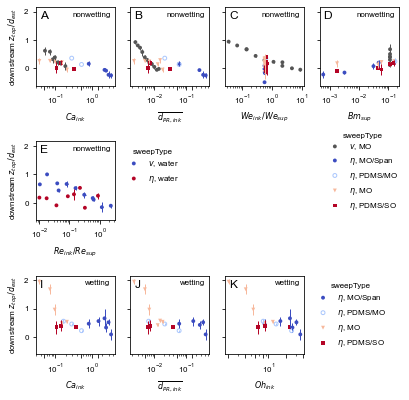

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [10]:
vs1 = vs.copy()
vs1.sort_values(by='sigma', inplace=True)
mp.simplifyType(vs1)
me.plainTypes(vs1, incSweep=1, abbrev=True)
fig, axs = plt.subplots(3,4, figsize=(6.5, 7), sharey=True)
me.addRatios(vs1, varlist=['We'], operator='Ratio')
fs = 8
kwargs = {'markersize':15, 'logx':True, 'fontsize':fs}
for i,xvar in enumerate(['ink_Ca', 'ink_dnorm', 'WeRatio', 'sup_Bm']):
    mp.sweepTypeSS(vs1[(vs1.wetting==0)&(vs1.sigma>0)], xvar, 'vertDispBotN',
                   ax=axs[0][i], legend=(i==3), legendloc='below', set_ylabel=(i==0), **kwargs)
    axs[0][i].text(0.95, 0.95, 'nonwetting', fontsize=fs, transform=axs[0][i].transAxes, horizontalalignment='right', verticalalignment='top')
for i,xvar in enumerate(['ReRatio']):
    mp.sweepTypeSS(vs1[(vs1.wetting==0)&(vs1.ink_base=='water')], xvar, 'vertDispBotN', 
                   ax=axs[1][i], legend=(i==0), legendloc='right', set_ylabel=(i==0), **kwargs)
    axs[1][i].text(0.95, 0.95, 'nonwetting', fontsize=fs, transform=axs[1][i].transAxes, horizontalalignment='right', verticalalignment='top')
axs[1][1].remove()
axs[1][2].remove()
axs[1][3].remove()
for i,xvar in enumerate(['ink_Ca', 'ink_dnorm', 'ink_Oh']):
    mp.sweepTypeSS(vs1[(vs1.wetting==1)&(vs1.sigma>0)], xvar, 'vertDispBotN',
                   ax=axs[2][i], legend=(i==2), legendloc='right', set_ylabel=(i==0), **kwargs)
    axs[2][i].text(0.95, 0.95, 'wetting', fontsize=fs, transform=axs[2][i].transAxes, horizontalalignment='right', verticalalignment='top')
axs[2][3].remove()
for axrow in axs:
    for ax in axrow:
        mp.setSquare(ax)
# fig.tight_layout()
plt.subplots_adjust(wspace=0)
mp.subFigureLabels(axs)
fig.savefig(os.path.join(cfg.path.fig, 'paper figures', 'supfigures', 'vert_botN_corrs.pdf'), bbox_inches='tight', dpi=300)